# Problem:

**To understand Employee Attrition**
* Why are the employees leaving the company?
* Who are the employees that will possibly leave the company in the future?
* What can be done to retain such employees?

# Data Description:

Data Source : [Kaggle](https://www.kaggle.com/dineshsagar66/hr-analytics-people-management)

The data has 14999 rows & 10 columns.

Feature Details :

satisfaction_level: Satisfaction level score between 0 and 1

last_evaluation: Last evaluation score given to the employee

number_project: Number of projects worked on per year

average_montly_hours: Average monthly working hours

time_spend_company: Time spent in the company in years

Work_accident: Whether they have had a work accident in the last 2 years

promotion_last_5years: Whether they have had a promotion in the last 5 years

department: Department the employee is working in

salary: salary of the employee (low, medium, high)

left: Whether the employee has left or is still working

# Importing Required Libraries & data:

In [3]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix

In [36]:
# importing the data

emp = pd.read_csv('employee.csv')

# checking the dataframe's shape
emp.shape

(14999, 10)

In [37]:
# dropping rows that have exactly same value for all features

emp.drop_duplicates(inplace=True)

# re-checking the dataframe's shape
emp.shape 

(11991, 10)

# Exploratory Data Analysis

In [50]:
emp.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.41,0.46,2,128,3,0,0,accounting,low,1
1,0.65,0.76,4,171,4,0,0,technical,low,0
2,0.94,0.52,3,273,3,0,0,product_mng,high,0


In [51]:
# checking the variable types of the data

emp.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

In [52]:
#checking number of missing values in each column

emp.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

In [4]:
# count of 'working' and 'left' employees:

print('Count of working employees(0) and ex-employees(1):')
emp['left'].value_counts()

Count of working employees(0) and ex-employees(1):


0    10000
1     1991
Name: left, dtype: int64

In [56]:
#checking counts of other categorical features : 

print('Count of employees in different salary groups:')
print(emp.salary.value_counts())

print(' \nCount of employees in different departments:')
emp.department.value_counts()

Count of employees in different salary groups:
low       5740
medium    5261
high       990
Name: salary, dtype: int64
 
Count of employees in different departments:


sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

In [43]:
# print('Salary-wise number of employees those who have left and those who are still working : \n')

# emp.groupby(by=["salary",'left']).count().iloc[:,:1].rename(columns = {'satisfaction_level':'Count'})

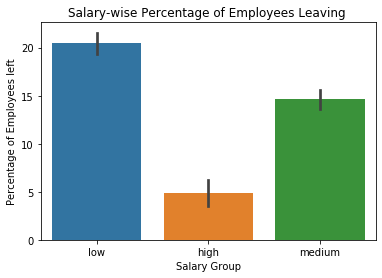

In [41]:
sns.barplot(x='salary', y='left', data=emp, estimator=lambda x: sum(x==1)*100.0/len(x))
plt.ylabel('Percentage of Employees left')
plt.xlabel('Salary Group')
plt.title('Salary-wise Percentage of Employees Leaving ')
plt.show()

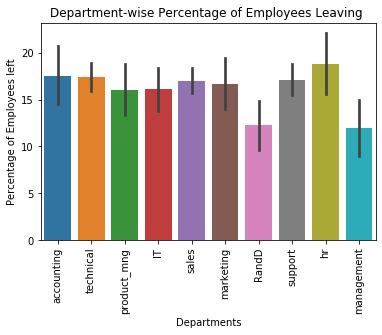

In [42]:
sns.barplot(x='department', y='left', data=emp, estimator=lambda x: sum(x==1)*100.0/len(x))
plt.ylabel('Percentage of Employees left')
plt.xlabel('Departments')
plt.title('Department-wise Percentage of Employees Leaving ')
plt.xticks(rotation=90)
plt.show()

In [6]:
# since salary has 3 ordninal values : low, medium and high ; they can be converted to 1, 2 and 3 respectively

salary_map = {'low':1, 'medium':2, 'high':3}
emp['salary'] = emp['salary'].map(salary_map)

emp.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.41,0.46,2,128,3,0,0,accounting,1,1
1,0.65,0.76,4,171,4,0,0,technical,1,0
2,0.94,0.52,3,273,3,0,0,product_mng,3,0


In [58]:
# statistical summary
print('Statistical summary of numerical features of all employees: \n')

emp.describe()

Statistical summary of numerical features of all employees: 



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.016929,1.60387,0.166041
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.129012,0.63590,0.372133
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.00000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,1.00000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.00000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,2.00000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,3.00000,1.000000


**Observations :**

* The employees are 63% satisfied with their jobs on an average

* Out of 1 they have mean performance score of 0.72 

* On an average, an employee worked on 3 to 4 projects (3.8 mean)

* The employees take 200 hours to do their jobs per month

* An average employee worked almost 3.4 years in the company. Minimum number of working years among  employees are 2 & maximum are 10

* Only 1.7% of employees were promoted in the last 5 years

* Employee churn rate is 16.6%

In [7]:
# data has been filtered for left and working employees: 
#left coulumns are dropped since all values will be same

emp_left = emp[emp['left']==1].drop('left',axis=1)
emp_working = emp[emp['left']==0].drop('left',axis=1)

In [60]:
print('Statistical summary for those who are still working: \n')
emp_working.describe()

Statistical summary for those who are still working: 



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.667365,0.715667,3.786800,198.942700,3.262000,0.174500,0.019500,1.637600
std,0.217082,0.161919,0.981755,45.665507,1.367239,0.379558,0.138281,0.647695
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,1.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,2.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,3.000000


In [61]:
print('Statistical summary for those who have left: \n')
emp_left.describe()

Statistical summary for those who have left: 



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,0.440271,0.721783,3.883476,208.162230,3.881467,0.052737,0.004018,1.434455
std,0.265207,0.197436,1.817139,61.295145,0.974041,0.223565,0.063277,0.542281
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.000000
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,0.000000,1.000000
75%,0.730000,0.910000,6.000000,262.500000,5.000000,0.000000,0.000000,2.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,3.000000


**Observations :**

* The working employees are 67% satisfied but the quitted ones were only 44% satisfied, on an average.

* Out of 1, the mean performance scores of quitted ones (0.72) & working employees (0.71) are almost equal.

* On an average, the ones who have quitted, had worked on more projects (3.88) , than the employees who are still working(3.79).

* The quitted ones had also spent more time monthly working , and, they were working for a longer period than the still working ones.

* Among the quitted employees, a mere 0.4% of employees were promoted in the last 5 years in comparison to 1.95% among the working ones.

* It is clearly observed that quitted employees worked more but were promoted less and were less satisfied.

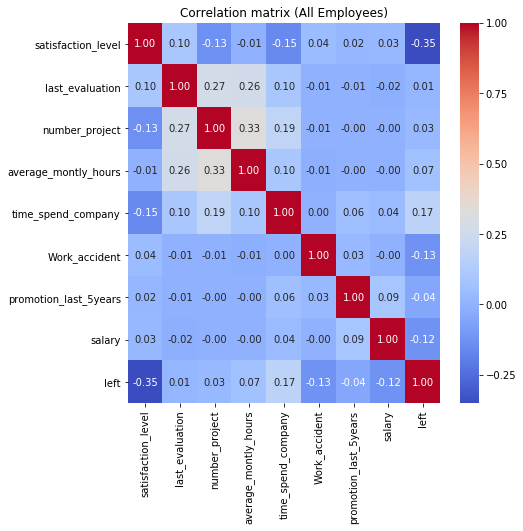

In [65]:
# checking correlation among variables for all employees:

plt.figure(figsize=(7,7))
ax = sns.heatmap(emp.corr(), cmap='coolwarm',annot=True,fmt = ".2f")
top,bottom = ax.get_ylim()
ax.set_ylim(top + 0.5, bottom - 0.5)
plt.title('Correlation matrix (All Employees)')
plt.show()

**Observations :**

* There is no high correaltion among the features.

* There is moderate negative correaltion between left and satifaction_level (-0.35).

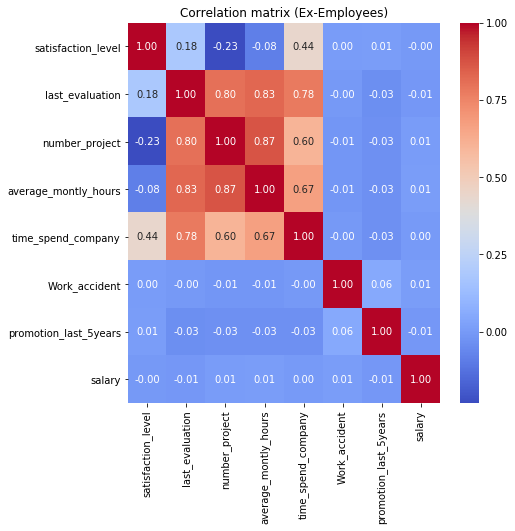

In [64]:
# checking correlation among ex-emloyees' features :

plt.figure(figsize=(7,7))
ax = sns.heatmap(emp_left.corr(), cmap='coolwarm',annot=True,fmt = ".2f")
top,bottom = ax.get_ylim()
ax.set_ylim(top + 0.5, bottom - 0.5)
plt.title('Correlation matrix (Ex-Employees)')
plt.show()

**Observations :**

* Here we see high correaltion between many features.

* Average monthly hours is highly correlated with number of projects (0.87). The more time an employee gives, the more project he does.

* Last evaluation score is highly correlated with average monthly hours (0.83) and number of projects (0.80). This is expected as high evaluation score is given to employees who work on more projects by spending more time every month.

# Chi square test between Department and attrition

In [32]:
import scipy.stats as stats

print("Chi Square test of independence for 'Employee Departments' and 'Employee Attrition':")
print('\n')
print("Ho: 'Employee Departments' and 'Employee Attrition' are independent")
print("Ha: 'Employee Departments' and 'Employee Attrition' are dependent \n")

chi_test = stats.chi2_contingency(pd.crosstab(emp['department'],emp['left']))
print('Chi Square Statistic = ',chi_test[0])
print('P-value = ',chi_test[1])
print('D.O.F. = ',chi_test[2])
print('Conclusion :')
if chi_test[1]<0.01:
    print('\t Reject Ho')
    print("\t Hence, 'Employee Departments' and 'Employee Attrition' are dependent")
    print('\t Departments feature should be considered as a predictor feature for Employee Attrition')
else:
    print('\t Fail to Reject Ho')
    print("\t Hence, Employee attrition is not dependent on departments of employees")
    print('\t So, Departments feature should not be considered as a predictor feature for Employee Attrition')

Chi Square test of independence for 'Employee Departments' and 'Employee Attrition':


Ho: 'Employee Departments' and 'Employee Attrition' are independent
Ha: 'Employee Departments' and 'Employee Attrition' are dependent 

Chi Square Statistic =  20.857513153795892
P-value =  0.01329832963300122
D.O.F. =  9
Conclusion :
	 Fail to Reject Ho
	 Hence, Employee attrition is not dependent on departments of employees
	 So, Departments feature should not be considered as a predictor feature for Employee Attrition


In [8]:
# dropping department feature 

emp.drop('department',axis = 1,inplace=True)

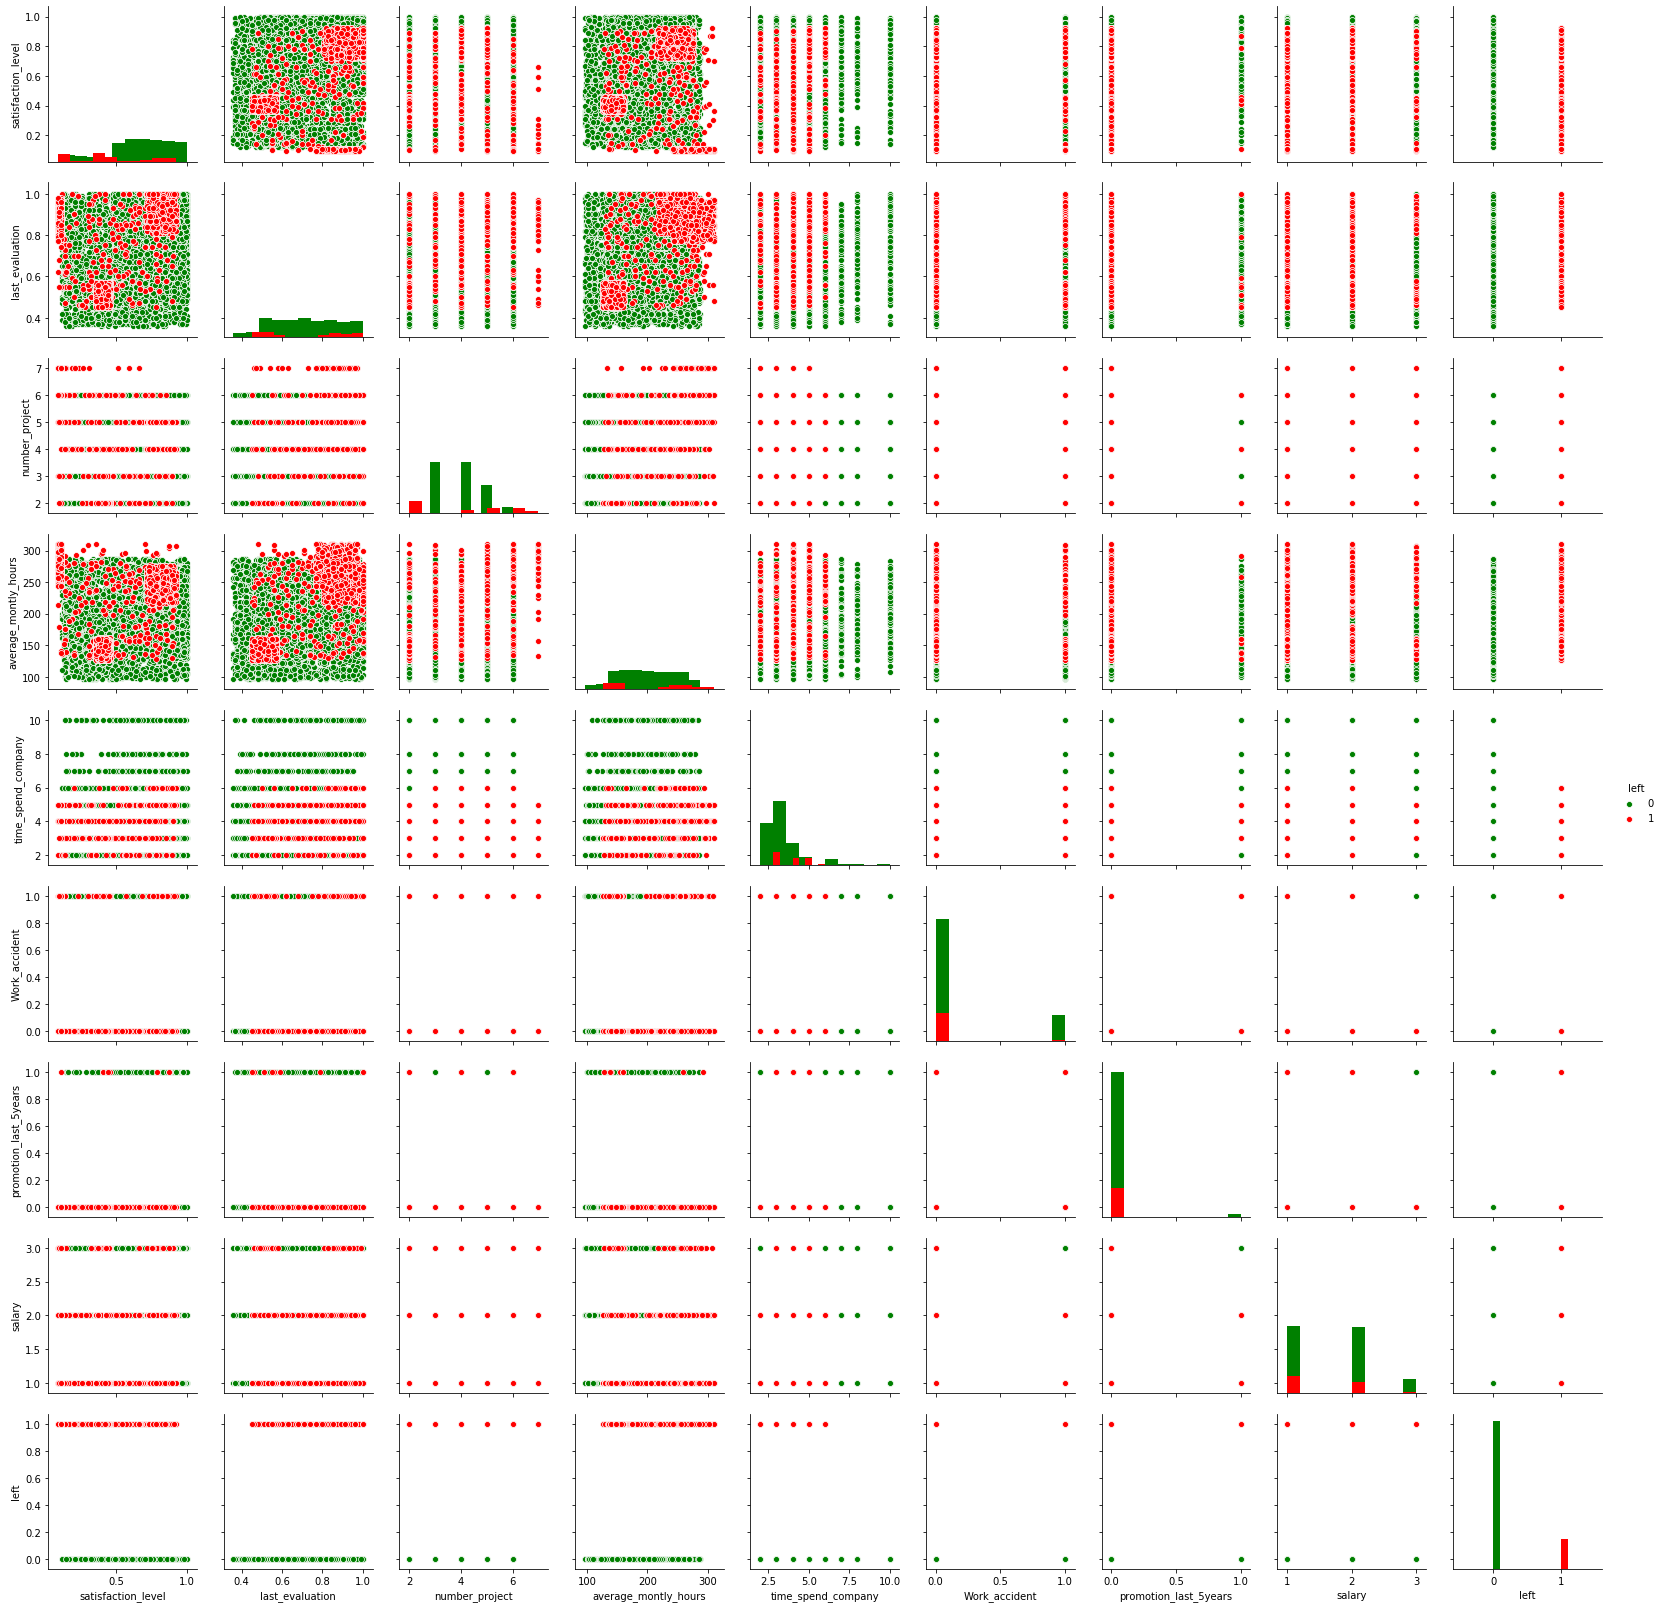

In [16]:
sns.pairplot(emp, hue ='left',diag_kind='hist',palette ={0: "green", 1: "red"})
plt.show()

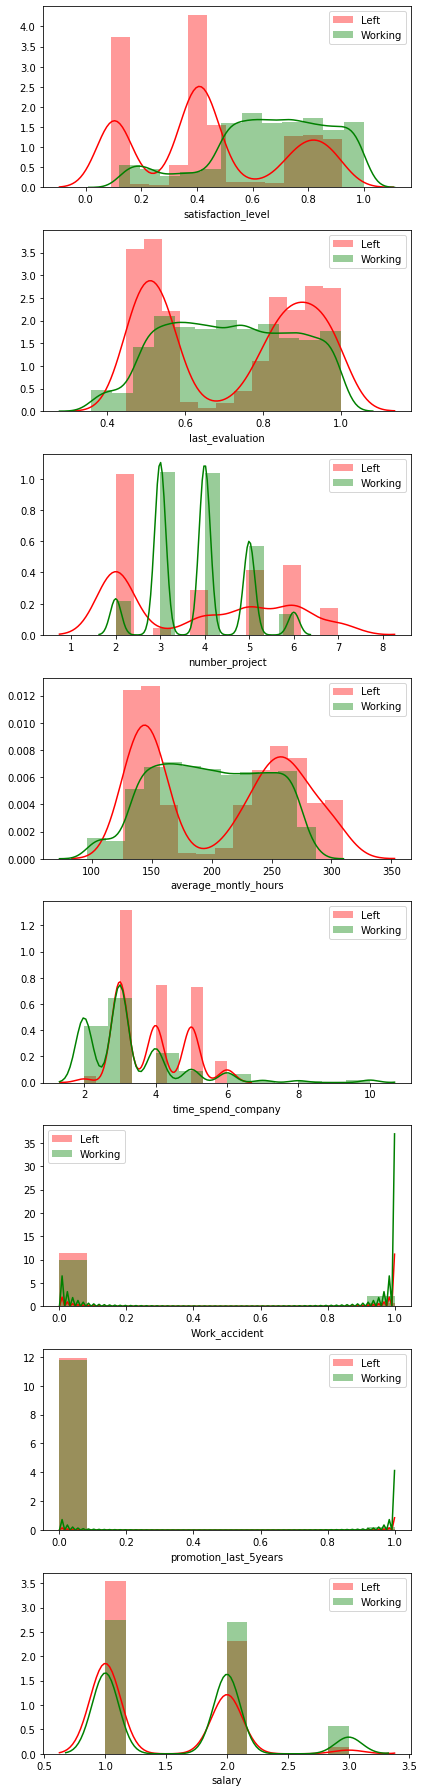

In [42]:
plt.figure(figsize=(6,25))
features = emp.drop('left',axis=1).columns

for i, feature in enumerate(features):
    rows = len(features)
    plt.subplot(rows, 1, i+1)
    sns.distplot(emp_left[feature], bins = 12, color='red', label='Left')
    sns.distplot(emp_working[feature], bins = 12, color='green', label='Working')
    plt.legend()
plt.tight_layout()
plt.show()

# Grouping Ex-Employees using KMeans

In [6]:
from sklearn.cluster import KMeans

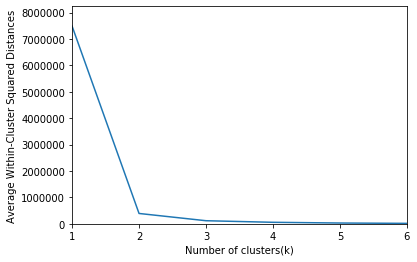

In [72]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(emp_left)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()    

**After 3 clusters, there is very little decrease in Average Within-Cluster Squared Distances, hence 3 clusters will be formed**

In [73]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(emp_left)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [74]:
emp_left.groupby(kmeans.labels_).mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary
0,0.607687,0.890034,4.943878,242.551020,4.765306,0.064626,0.001701,1.426871
1,0.283956,0.868293,5.714859,282.953815,4.317269,0.038153,0.002008,1.457831
2,0.417514,0.531845,2.186740,144.662983,3.067403,0.053039,0.006630,1.426519


In [77]:
print('Number of Ex-employees in each cluster : \n')
emp_left.groupby(kmeans.labels_).count().iloc[:,:1].rename(columns = {'satisfaction_level':'Count'})

Number of Ex-employees in each cluster : 



,Count
0,588
1,498
2,905


## Normalising the data:

In [9]:
# Normalising using Min-Max scaler (outcome feature has binary values 0, 1 so they will remain same, hence no need to separate it )
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

emp_scaled = scaler.fit_transform(emp)
emp_scaled_df = pd.DataFrame(emp_scaled,columns=emp.columns)
emp_scaled_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.351648,0.156250,0.0,0.149533,0.125,0.0,0.0,0.0,1.0
1,0.615385,0.625000,0.4,0.350467,0.250,0.0,0.0,0.0,0.0
2,0.934066,0.250000,0.2,0.827103,0.125,0.0,0.0,1.0,0.0
3,0.912088,0.984375,0.4,0.696262,0.250,0.0,0.0,0.5,0.0
4,0.373626,0.156250,0.0,0.140187,0.125,0.0,0.0,0.5,1.0


## Splitting data in train & test sets

In [12]:
# splitting data into test and train set

X = emp_scaled_df.drop('left',axis=1)
y = emp_scaled_df['left']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

## Dealing with imbalance in the outcome class:

**Three things to do when dealing with dataset with imbalanced classes:**

1. Select performance metrics, such as those that focus on the minority class (Recall)
    
    
2. Select data preparation methods, such as those that attempt to re-balance the classes
    * Undersample Majority Class : Creates information loss, do only if data set is very huge
    * Random Oversampling Minority Class : Duplicates minority class data, hence can create overfitting
    * SMOTE-Synthetic minority oversampling technique : Using nearest neighbors, creates synthesized minority data points
       
       
3. Select classification algorithms, such as those that penalize misclassification errors differently (Ensemble methods)

## SMOTE method:

In [13]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(sampling_strategy=0.75, random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0.0: 7521, 1.0: 1472})
Resampled dataset shape Counter({0.0: 7521, 1.0: 5640})


## Random Oversampling of Minority Class:

In [14]:
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))
os=RandomOverSampler(sampling_strategy=0.75, random_state=42)
X_train_os,y_train_os = os.fit_sample(X_train,y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0.0: 7521, 1.0: 1472})
Resampled dataset shape Counter({0.0: 7521, 1.0: 5640})


# KNN with original data

In [12]:
from sklearn.neighbors import KNeighborsClassifier

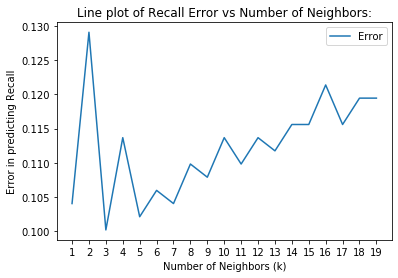

In [13]:
recall_errors = [] #to store "1 - recall" values for different k
for K in range(1,20):
    
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    cm = confusion_matrix(y_test,pred)
    recall_error = 1 - (cm[1,1]/(cm[1,0]+cm[1,1]))
    recall_errors.append(recall_error) #store recall values
    
curve = pd.DataFrame(recall_errors) 
sns.lineplot(x=range(1,20),y = curve.iloc[:,0],label='Error')
plt.xticks(range(1,20))
plt.title('Line plot of Recall Error vs Number of Neighbors:')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error in predicting Recall')
plt.legend()
plt.show()

**At k = 3, recall for 'left' employees is getting predicted the best**

In [14]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, y_train)  #fit the model
knn_pred = knn.predict(X_test) #make prediction on test set
knn_cm = confusion_matrix(y_test,knn_pred)
print(knn_cm)
print('\n')
print(classification_report(y_test,knn_pred))

[[2428   51]
 [  52  467]]


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2479
         1.0       0.90      0.90      0.90       519

    accuracy                           0.97      2998
   macro avg       0.94      0.94      0.94      2998
weighted avg       0.97      0.97      0.97      2998



# KNN with SMOTE

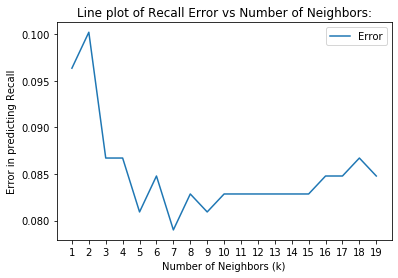

In [25]:
recall_errors_sm = [] #to store "1 - recall" values for different k
for K in range(1,20):
    
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train_smote, y_train_smote)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    cm = confusion_matrix(y_test,pred)
    recall_error = 1 - (cm[1,1]/(cm[1,0]+cm[1,1]))
    recall_errors_sm.append(recall_error) #store recall values
    
curve = pd.DataFrame(recall_errors_sm) 
sns.lineplot(x=range(1,20),y = curve.iloc[:,0],label='Error')
plt.xticks(range(1,20))
plt.title('Line plot of Recall Error vs Number of Neighbors:')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error in predicting Recall')
plt.legend()
plt.show()

In [27]:
knn_sm = KNeighborsClassifier(n_neighbors = 7)

knn_sm.fit(X_train_smote, y_train_smote)  #fit the model
knn_pred_sm = knn_sm.predict(X_test) #make prediction on test set
knn_cm_sm = confusion_matrix(y_test,knn_pred_sm)
print(knn_cm_sm)
print('\n')
print(classification_report(y_test,knn_pred_sm))

[[2364  115]
 [  41  478]]


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2479
         1.0       0.81      0.92      0.86       519

    accuracy                           0.95      2998
   macro avg       0.89      0.94      0.91      2998
weighted avg       0.95      0.95      0.95      2998



# KNN with Random Oversampled data:

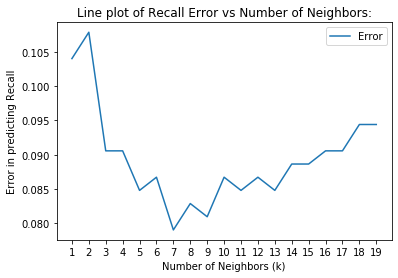

In [28]:
recall_errors_os = [] #to store "1 - recall" values for different k
for K in range(1,20):
    
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train_os, y_train_os)  #fit the model
    pred = model.predict(X_test) #make prediction on test set
    cm = confusion_matrix(y_test,pred)
    recall_error = 1 - (cm[1,1]/(cm[1,0]+cm[1,1]))
    recall_errors_os.append(recall_error) #store recall values
    
#plotting line plot
curve = pd.DataFrame(recall_errors_os) 
sns.lineplot(x=range(1,20),y = curve.iloc[:,0],label='Error')
plt.xticks(range(1,20))
plt.title('Line plot of Recall Error vs Number of Neighbors:')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error in predicting Recall')
plt.legend()
plt.show()

In [29]:
knn_os = KNeighborsClassifier(n_neighbors = 7)

knn_os.fit(X_train_os, y_train_os)  #fit the model
knn_pred_os = knn_sm.predict(X_test) #make prediction on test set
knn_cm_os = confusion_matrix(y_test,knn_pred_os)
print(knn_cm_os)
print('\n')
print(classification_report(y_test,knn_pred_os))

[[2364  115]
 [  41  478]]


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      2479
         1.0       0.81      0.92      0.86       519

    accuracy                           0.95      2998
   macro avg       0.89      0.94      0.91      2998
weighted avg       0.95      0.95      0.95      2998



# Decision Tree with original data

In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

In [18]:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4],'criterion' : ["gini", "entropy"]}

grid_search_cv = GridSearchCV(DTC(random_state=42), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv.fit(X_train, y_train)

DT = grid_search_cv.best_estimator_
DT_pred = DT.predict(X_test) #make prediction on test set
DT_cm = confusion_matrix(y_test,DT_pred)
print(DT_cm)
print('\n')
print(classification_report(y_test,DT_pred))

[[2356  123]
 [  48  471]]


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96      2479
         1.0       0.79      0.91      0.85       519

    accuracy                           0.94      2998
   macro avg       0.89      0.93      0.91      2998
weighted avg       0.95      0.94      0.94      2998



# DT with SMOTE data

In [19]:
grid_search_cv_sm = GridSearchCV(DTC(random_state=42), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv_sm.fit(X_train_smote, y_train_smote)

DT_sm = grid_search_cv_sm.best_estimator_
DT_pred_sm = DT_sm.predict(X_test) #make prediction on test set
DT_cm_sm = confusion_matrix(y_test,DT_pred_sm)
print(DT_cm_sm)
print('\n')
print(classification_report(y_test,DT_pred_sm))

[[1923  556]
 [  23  496]]


              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      2479
         1.0       0.47      0.96      0.63       519

    accuracy                           0.81      2998
   macro avg       0.73      0.87      0.75      2998
weighted avg       0.90      0.81      0.83      2998



# DT with Random oversampling data

In [20]:
grid_search_cv_os = GridSearchCV(DTC(random_state=42), param_grid = params, scoring = 'recall', cv=5)
grid_search_cv_os.fit(X_train_os, y_train_os)

DT_os = grid_search_cv_os.best_estimator_
DT_pred_os = DT_os.predict(X_test) #make prediction on test set
DT_cm_os = confusion_matrix(y_test,DT_pred_os)
print(DT_cm_os)
print('\n')
print(classification_report(y_test,DT_pred_os))

[[1923  556]
 [  23  496]]


              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87      2479
         1.0       0.47      0.96      0.63       519

    accuracy                           0.81      2998
   macro avg       0.73      0.87      0.75      2998
weighted avg       0.90      0.81      0.83      2998



# Random Forest with original data

In [15]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


# Instantiate model with 500 decision trees
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test) #make prediction on test set
rf_cm = confusion_matrix(y_test,rf_pred)
print(rf_cm)
print('\n')
print(classification_report(y_test,rf_pred))

[[2472    7]
 [  44  475]]


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2479
         1.0       0.99      0.92      0.95       519

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



# Random Forest using SMOTE dataset

In [16]:
rf_sm = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf_sm.fit(X_train_smote, y_train_smote)

rf_pred_sm = rf_sm.predict(X_test) #make prediction on test set
rf_cm_sm = confusion_matrix(y_test,rf_pred_sm)
print(rf_cm_sm)
print('\n')
print(classification_report(y_test,rf_pred_sm))

[[2469   10]
 [  47  472]]


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2479
         1.0       0.98      0.91      0.94       519

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



# Random Forest using random oversampled dataset

In [17]:
rf_os = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf_os.fit(X_train_os, y_train_os)

rf_pred_os = rf_os.predict(X_test) #make prediction on test set
rf_cm_os = confusion_matrix(y_test,rf_pred_os)
print(rf_cm_os)
print('\n')
print(classification_report(y_test,rf_pred_os))

[[2471    8]
 [  48  471]]


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2479
         1.0       0.98      0.91      0.94       519

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.97      2998
weighted avg       0.98      0.98      0.98      2998



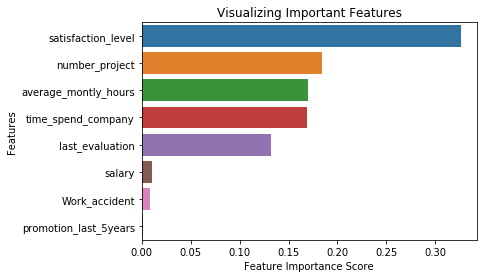

In [31]:
# checking feature importance score in random forest model

feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

# Random Forest with important features

In [18]:
X_train_new = X_train[['satisfaction_level', 'number_project','average_montly_hours','time_spend_company','last_evaluation']]  # taking only important features
X_test_new = X_test[['satisfaction_level', 'number_project','average_montly_hours','time_spend_company','last_evaluation']]

rf_new = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf_new.fit(X_train_new, y_train)

rf_pred_new = rf_new.predict(X_test_new) #make prediction on test set
rf_cm_new = confusion_matrix(y_test,rf_pred_new)
print(rf_cm_new)
print('\n')
print(classification_report(y_test,rf_pred_new))

[[2474    5]
 [  45  474]]


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2479
         1.0       0.99      0.91      0.95       519

    accuracy                           0.98      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



# Model Selection:

* If company is aggresive about retaining employees then DT with SMOTE model should be chosen. It is classyfying those who left  96% correctly,however it is misclassyfying those employees who will not leave in large number. So if comapany focusses on the employees who might leave, then they will have to pay attention to larger number of employees.


* If company wants to retain employees however budget is restricted, then random forest with important feature model can be chosen,as it is predicting the potential employees who might leave 91% correctly with only 5 features, and also it is predicting the other class with close to 100% accuracy.